## Topics to be covered - 
* Understanding Python with NLP
* Introduction to usage of - 
    * Sklearn
    * NLTK
    * textblob
    * vaderSentiment
* Coverage of related concepts.
* Webscrapping


In [61]:
import pandas as pd
data= pd.read_csv('./Dataset/flight_data.csv')
data.head()



,YEAR,MONTH,DAY,CARRIER,ORIGIN,DEST,SCHED_DEP_TIME,ACT_DEP_TIME,DEP_DELAY,SCHED_ARR_TIME,ACT_ARR_TIME,ARR_DELAY
0,2019,7,24,G4,PIE,AVL,1511,1533.0,22.0,1644,1659.0,15.0
1,2019,7,29,G4,AUS,SFB,2002,2010.0,8.0,2335,2344.0,9.0
2,2019,7,7,G4,GRI,LAS,1118,1118.0,0.0,1144,1139.0,-5.0
3,2019,7,7,G4,AUS,MEM,1643,1726.0,43.0,1827,1922.0,55.0
4,2019,7,8,G4,IND,PIE,858,905.0,7.0,1107,1119.0,12.0


lets find about which airport has the longest average delay in terms of flight departure.

In [62]:
data.groupby("ORIGIN")["DEP_DELAY"].mean().idxmax()

'PPG'

Here, `idxmax()`, which returns the index of the maximum value of a row or column in a data frame

In [63]:
data[data['ORIGIN']=='PPG'].max()

YEAR                2019
MONTH                  7
DAY                   30
CARRIER               HA
ORIGIN               PPG
DEST                 HNL
SCHED_DEP_TIME      2320
ACT_DEP_TIME      2347.0
DEP_DELAY         1014.0
SCHED_ARR_TIME       550
ACT_ARR_TIME      2231.0
ARR_DELAY         1001.0
dtype: object

`CountVectorizer` - used for text preprocessing and representation when building machine learning models.

Its primary function is to transform a collection of text documents into a sparse matrix of token counts, a process known as creating a "__Bag-of-Words__" model.

__How CountVectorizer Works__\
CountVectorizer handles two main steps: tokenization and counting.\
1. __Tokenization__\
It breaks down text into individual units, usually words, called "tokens".
2. __Building a Vocabulary and Counting__\
It scans all provided documents to:
* Identify every unique word used across the entire corpus. This list becomes the "vocabulary".
* For each document, count the frequency of these unique words.\
The output is a document-term matrix, where:
* Each `row` represents a single text document.
* Each `column` represents a unique word in the vocabulary.
* Each `cell value` is the count of how many times that specific word appears in that specific document.


In [64]:
from sklearn.feature_extraction.text import CountVectorizer
sentence = ["How to change payment method and payment frequency"]
vectorizer = CountVectorizer(stop_words='english')
vectorizer.fit_transform(sentence).todense()


matrix([[1, 1, 1, 2]])

`Initialization`: CountVectorizer(stop_words='english') creates an instance that automatically removes common "stop words" (like "how", "to", "and", etc.) during processing.\
`Fitting and Transforming`: vectorizer.fit_transform(sentence) scans the input sentence to learn a vocabulary (['change', 'frequency', 'method', 'payment']) and then counts the occurrences of those specific words.\
`Output`: .todense() converts the result into an easy-to-read dense matrix. The final matrix [[1, 1, 1, 2]] represents the counts of these four words, respectively. Words like "how" were ignored.

### __Natural Language Toolkit library (NLTK)__
A corpus is a large body of text or linguistic data and is very important in NLP research for
application development and testing. NLTK allows users to access over 50 corpora and
lexical resources.\
NLTK provides various functions that help us transform the text into vectors. The most
basic NLTK function for this purpose is tokenization, which splits a document into a list of
units. These units could be words, alphabets, or sentences.



In [65]:
import certifi
certifi.where()

'/Users/shekh-abdullah-ayubi/Documents/CodeIT-NLP/NLPvenv/lib/python3.14/site-packages/certifi/cacert.pem'

This certifi module will help you to show the certificate location and accordingly you are supposed to create `bash_profile` file in you location with below content - \
export CURL_CA_BUNDLE=`your certificate location`
export SSL_CERT_FILE=`your certificate location`
export GIT_SSL_CAPATH=`your certificate location`
export REQUESTS_CA_BUNDLE=`your certificate location`

and run `source ./bash_profile` command in your terminal to execute this bash as your profile.

once done you can run, nltk.download('As per the need') in your terminal




In [66]:
import nltk
text = "Who would have thought that computer programs would be analyzing human sentiments"
from nltk.tokenize import word_tokenize

tokens = word_tokenize(text)
print(tokens)

['Who', 'would', 'have', 'thought', 'that', 'computer', 'programs', 'would', 'be', 'analyzing', 'human', 'sentiments']


`word_tokenize` is a function from the Natural Language Toolkit (NLTK) library that splits a string of text into individual words or punctuation marks, known as __tokens__. 

The following is a partial list of English stop words in NLTK. __`Stop words`__ are mostly
<u>connector words that do not contribute much to the meaning of the sentence</u>

In [67]:
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

we can simply look up this list and filter
out stop words from our word list:

In [68]:
[word for word in tokens if word not in stopwords]

['Who',
 'would',
 'thought',
 'computer',
 'programs',
 'would',
 'analyzing',
 'human',
 'sentiments']

### Lemmatization and Stemming - 
Stemming and lemmatization are both text normalization techniques used in Natural Language Processing (NLP) to reduce words to their base or root form.

The lemma is always a real, meaningful word (e.g., running becomes run, studies becomes study, am/is/are all become be).

In [69]:
from nltk.stem import WordNetLemmatizer
text = "Who would have thought that computer programs would be analyzing human sentiments"
tokens = word_tokenize(text)
lemmatizer = WordNetLemmatizer()
tokens=[lemmatizer.lemmatize(word) for word in tokens]
print(tokens)

['Who', 'would', 'have', 'thought', 'that', 'computer', 'program', 'would', 'be', 'analyzing', 'human', 'sentiment']


Lemmatization is performed by looking up a word in WordNet's inbuilt root word map. If
the word is not found, it returns the input word unchanged. However, we can see that the
performance of the lemmatizer was not good and it was only able to reduce programs and
sentiments from their plural forms. This shows that the lemmatizer is highly dependent
on the root word mapping and is highly susceptible to incorrect root word transformation.


Stemming is similar to lemmatization but instead of looking up root words in a pre-built
dictionary, it defines some rules based on which words are reduced to their root form. For
example, it has a rule that states that any word with ing as a suffix will be reduced by
removing the suffix.

In [70]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
text = "Who would have thought that computer programs would be analyzing human sentiments"
tokens=word_tokenize(text.lower())
ps = PorterStemmer()
tokens=[ps.stem(word) for word in tokens]
print(tokens)

['who', 'would', 'have', 'thought', 'that', 'comput', 'program', 'would', 'be', 'analyz', 'human', 'sentiment']


### __Part of speech tagging (POS tagging)__
Part of speech tagging (POS tagging) identifies the part of speech <u>(noun, verb, adverb, and
so on)</u> of each word in a sentence. It is a crucial step for many NLP applications since, by
identifying the POS of a word, we can deduce its contextual meaning.

In [71]:
nltk.pos_tag(["your"])

[('your', 'PRP$')]

In [72]:
nltk.pos_tag(["beautiful"])

[('beautiful', 'NN')]

In [73]:
nltk.pos_tag(["eat"])

[('eat', 'NN')]

In [74]:
from nltk.tokenize import word_tokenize
text = "Usain Bolt is the fastest runner in the world"
tokens = word_tokenize(text)
[nltk.pos_tag([word]) for word in tokens]

[[('Usain', 'NN')],
 [('Bolt', 'NN')],
 [('is', 'VBZ')],
 [('the', 'DT')],
 [('fastest', 'JJS')],
 [('runner', 'NN')],
 [('in', 'IN')],
 [('the', 'DT')],
 [('world', 'NN')]]

The exhaustive list of __NLTK POS__ tags can be accessed using the __upenn_tagset()__ function
of NLTK:


    import nltk

    nltk.download('tagsets') # need to download first time

    nltk.help.upenn_tagset()

### __Textblob__
Textblob is a popular library used for sentiment analysis, part of speech tagging,
translation, and so on. 

    pip install -U textblob

    python -m textblob.download_corpora


In [75]:
from textblob import TextBlob
TextBlob("I love pizza").sentiment

Sentiment(polarity=0.5, subjectivity=0.6)

Once the TextBlob library has been imported, all we need to do to calculate the sentiment
is to pass the text that needs to be analyzed and use the sentiment module of the library.
The sentiment module outputs a tuple with the polarity score and subjectivity score. The
`polarity score` ranges from __-1 to 1__, <u>with -1 being the most negative sentiment</u> and <u>1 being
the most positive statement</u>. The `subjectivity score` ranges from __0 to 1__, with a score of <u>0
implying that the statement is factual</u>, whereas a score of <u>1 implies a highly subjective
statement</u>.

In [76]:
TextBlob("The weather is excellent").sentiment

Sentiment(polarity=1.0, subjectivity=1.0)

In [77]:
TextBlob("What a terrible thing to say").sentiment

Sentiment(polarity=-1.0, subjectivity=1.0)

#### Machine translation

Textblob uses Google Translator's API to provide a very simple interface for translating
text. Simply use the translate() function to translate a given text into the desired
language.

In [85]:
from textblob import TextBlob
languages = ['fr','zh-CN','hi']
for language in languages:
    print(TextBlob("Who knew translation could be fun").translate(to=language))
    
TextBlob("The global economy is expected to grow this year").tags

AttributeError: 'TextBlob' object has no attribute 'translate'

In [86]:
TextBlob("The global economy is expected to grow this year").tags

[('The', 'DT'),
 ('global', 'JJ'),
 ('economy', 'NN'),
 ('is', 'VBZ'),
 ('expected', 'VBN'),
 ('to', 'TO'),
 ('grow', 'VB'),
 ('this', 'DT'),
 ('year', 'NN')]

### __VADER__
__Valence Aware Dictionary and sEntiment Reasoner (`VADER`)__ is lexicon-based sentiment analysis tool whose accuracy is shown to be much greater than the
existing lexicon-based sentiment analyzers. \
It improves on other sentiment analyzers by including
<u>colloquial language terms, emoticons, slang, acronyms, and so on, which are used
generously in social media</u>. It also factors in the intensity of words rather than classifying
them as simply positive or negative.

In [88]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

analyser.polarity_scores("This book is very good")


{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.4927}

In [89]:
analyser.polarity_scores("OMG! The book is so cool")

{'neg': 0.0, 'neu': 0.604, 'pos': 0.396, 'compound': 0.5079}

we can see that VADER outputs the negative score, neutral score, and positive score
and then aggregates them to calculate the compound score. The compound score is what
we are interested in. Any score greater than 0.05 is considered positive, while less than -0.05
is considered negative

### __Web scraping libraries and methodology__

In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


url ='https://webscraper.io/test-sites/e-commerce/allinone/computers/laptops'
request = requests.get(url)

In [8]:
request.text

'<!DOCTYPE html>\n<html lang="en">\n<head>\n\t<!-- Google Tag Manager -->\n<script nonce="fWYpiECCvBXbo0RhfsGn0OQjLNujzkDx">(function (w, d, s, l, i) {\n\t\tw[l] = w[l] || [];\n\t\tw[l].push({\n\t\t\t\'gtm.start\':\n\t\t\t\tnew Date().getTime(), event: \'gtm.js\'\n\t\t});\n\t\tvar f = d.getElementsByTagName(s)[0],\n\t\t\tj = d.createElement(s), dl = l != \'dataLayer\' ? \'&l=\' + l : \'\';\n\t\tj.async = true;\n\t\tj.src =\n\t\t\t\'https://www.googletagmanager.com/gtm.js?id=\' + i + dl;\n\t\tf.parentNode.insertBefore(j, f);\n\t})(window, document, \'script\', \'dataLayer\', \'GTM-NVFPDWB\');</script>\n<!-- End Google Tag Manager -->\n\t<title>Allinone | Web Scraper Test Sites</title>\n\t<meta charset="utf-8">\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n\n\t<meta name="keywords"\n\t\t  content="web scraping,Web Scraper,Chrome extension,Crawling,Cross platform scraper"/>\n\t<meta name="description"\n\t\t  content="Test Web Scraper&#039;s features and performance on

We use the BeautifulSoup module and pass the HTML code (request.text) and a
parameter called HTML Parser to it, which creates a BeautifulSoup HTML parser object.

We can now start formulating our web scraping strategy, which will involve iterating over
all the code divisions with the `col-md-4` `col-xl-4` `col-lg-4` class and then extracting
the relevant information in each iteration. We'll use Beautiful Soup's find_all() function
to identify all the `<div>` tags of the col-sm-4 col-lg-4 col-md-4 class. This function
creates an iteratable object and we use a for loop to search each subdivision. 
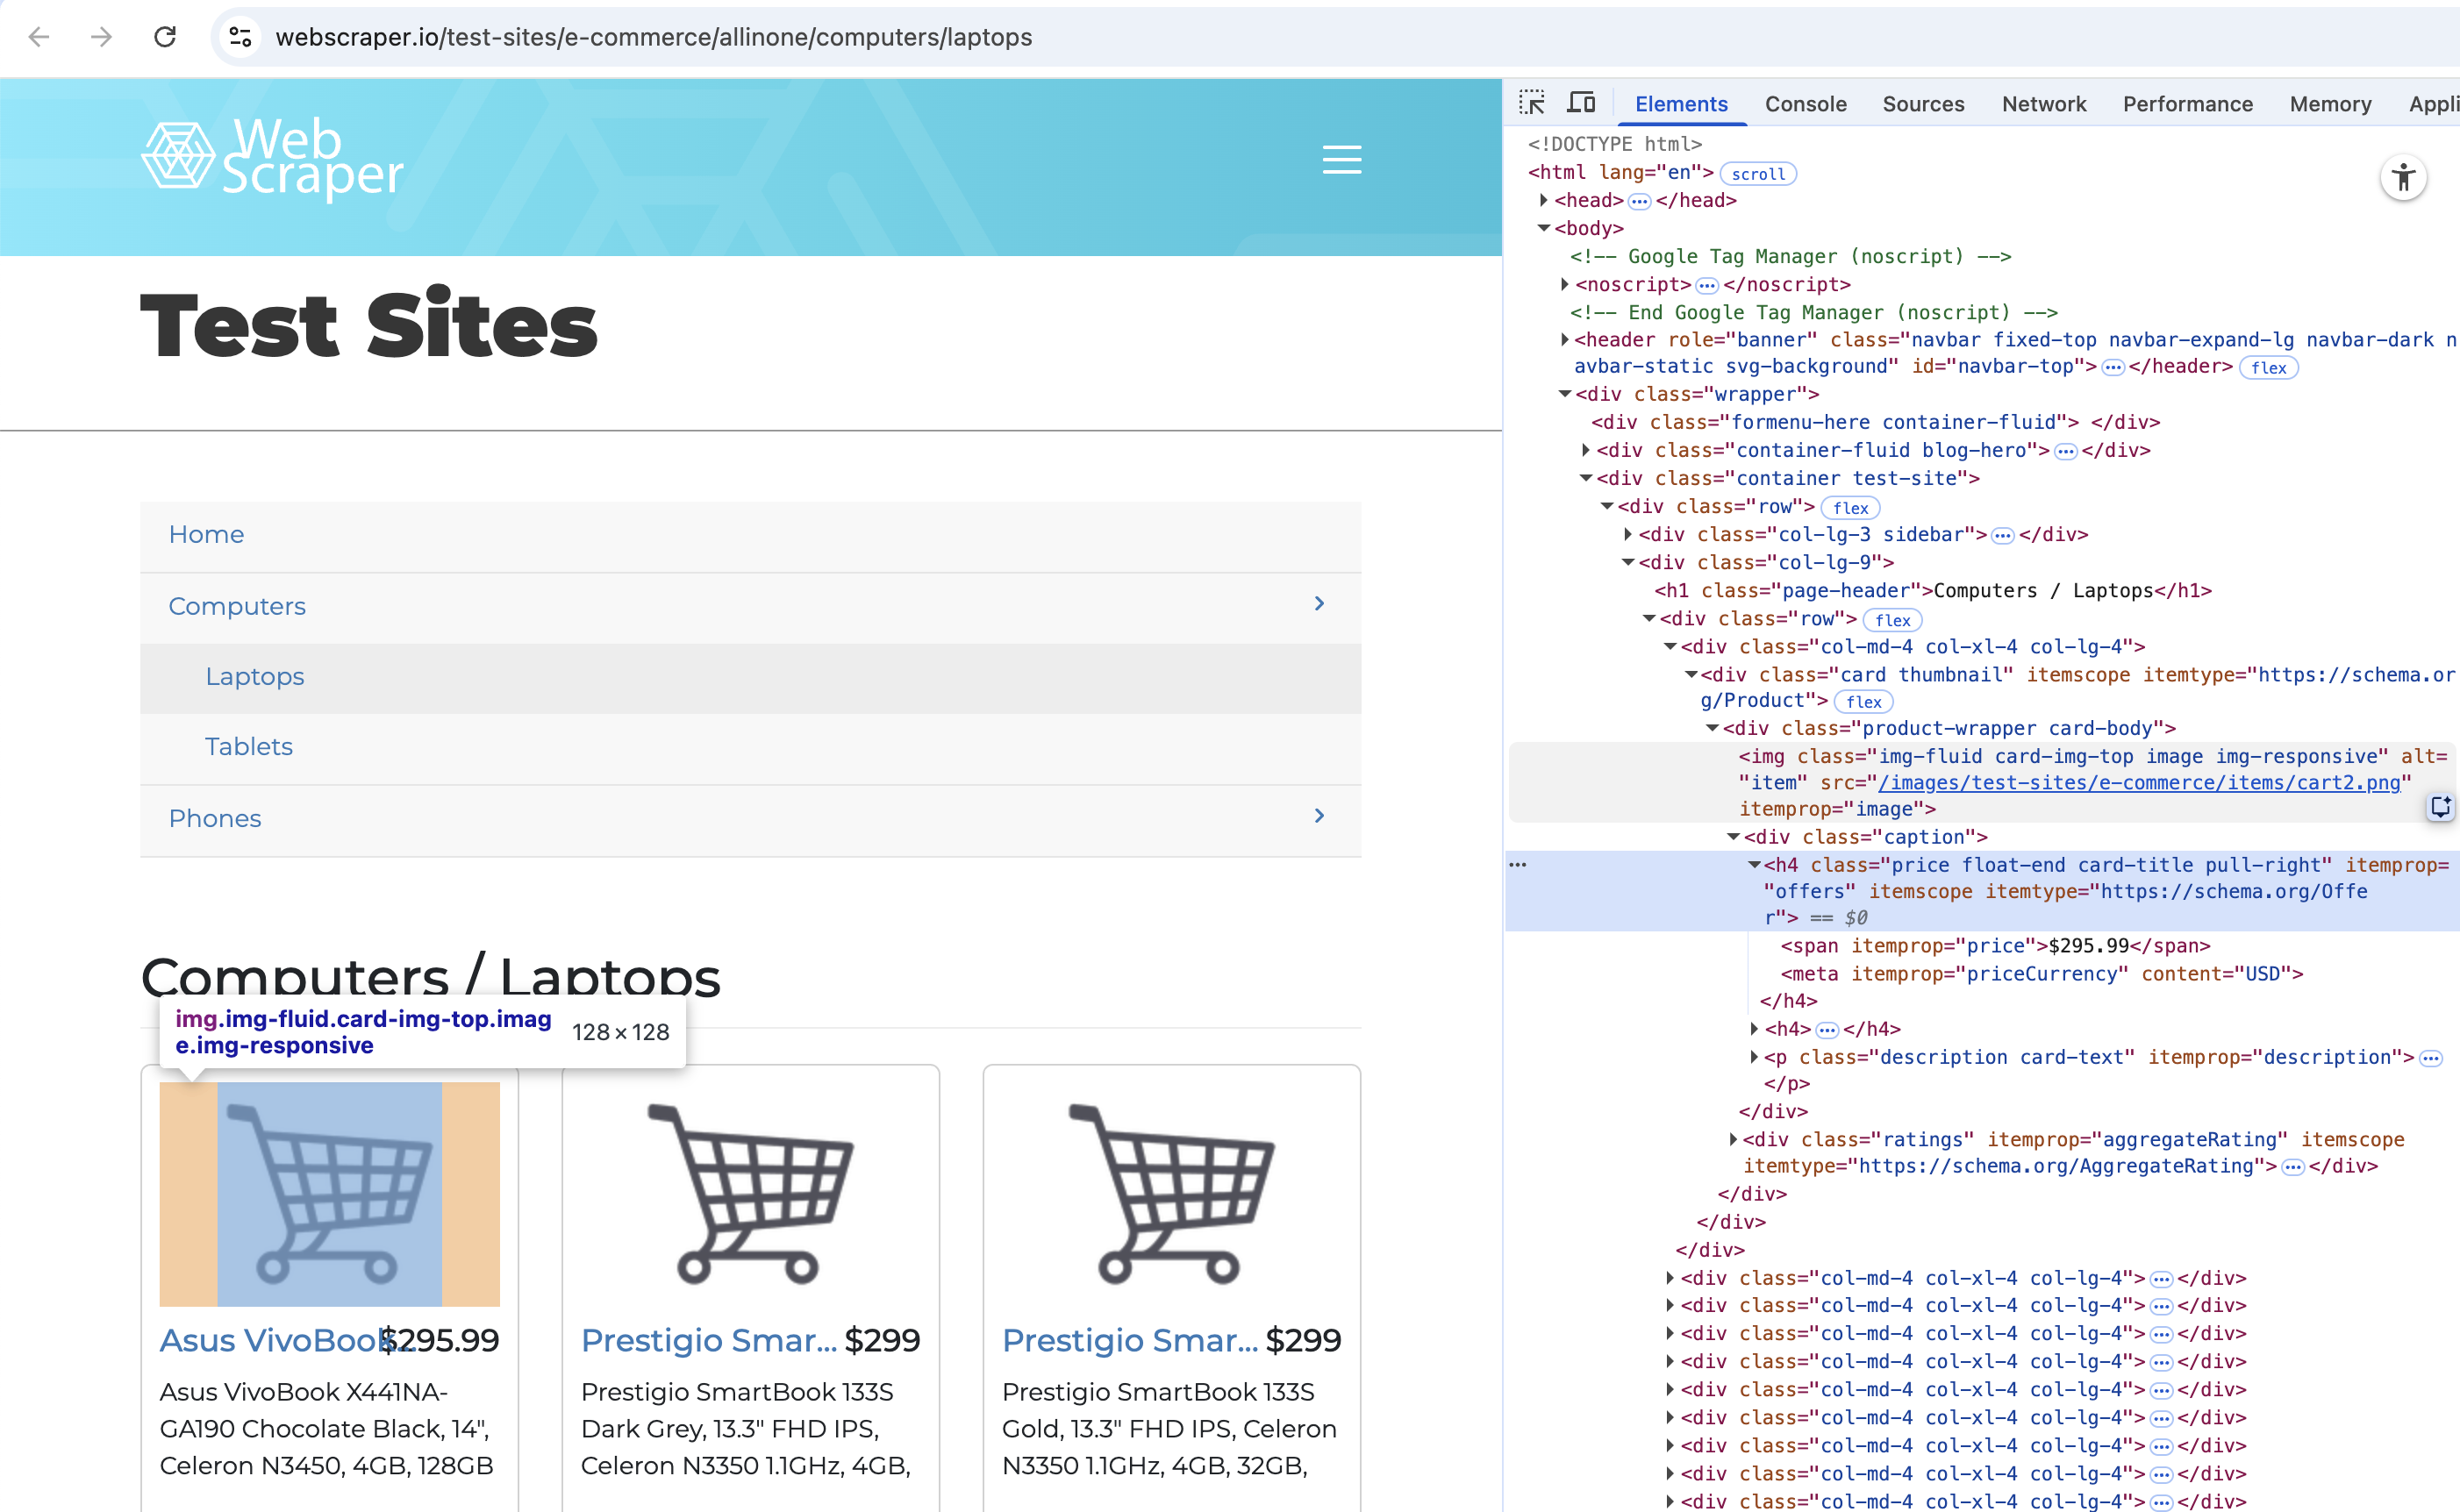

In [9]:
titles = []
prices = []
ratings = []
url ='https://webscraper.io/test-sites/e-commerce/allinone/computers/laptops'
request = requests.get(url)
soup = BeautifulSoup(request.text, "html.parser")
for product in soup.find_all('div', {'class': 'col-md-4 col-xl-4 col-lg-4'}):
    for pr in product.find_all('div', {'class': 'caption'}):
        for p in pr.find_all('h4', {'class': 'price float-end card-title pull-right'}):
            prices.append(p.text)
        for title in pr.find_all('a' , {'title'}):
            titles.append(title.get('title'))
    for rt in product.find_all('div', {'class': 'ratings'}):
        ratings.append(len(rt.find_all('span', {'class': 'glyphicon glyphicon-star'})))


#build dataframe and export to csv            
product_df = pd.DataFrame(zip(titles,prices,ratings), columns =['Titles', 'Prices', 'Ratings'])  
product_df.head()


,Titles,Prices,Ratings
0,Asus VivoBook X441NA-GA190,\n$295.99\n\n,0
1,Prestigio SmartBook 133S Dark Grey,\n$299\n\n,0
2,Prestigio SmartBook 133S Gold,\n$299\n\n,0
3,Aspire E1-510,\n$306.99\n\n,0
4,Lenovo V110-15IAP,\n$321.94\n\n,0


In [10]:
product_df.to_csv("ecommerce.csv",index=False)